In [102]:
import numpy as np

# parameters
N = 10 ** 2
q = 2


# J = np.ones((N,N))
# sigma = np.ones(N)
# print(sigma)
# def _u_slow_test(J, sigma):
#     en = 0
#     for i in range(N):
#         for j in range(N):
#             if i != j:
#                 if sigma[i] == sigma[j]:
#                     en += J[i,j]
#     return en

def U(J, sigma):
    en = 0
    for i in range(N):
        delta = sigma[i] == sigma
        en += np.dot(J[i], delta)
    return en - J.trace()

In [111]:
T = 3.
n_step = 100000
stride = 1e3

bins = 500000
min_en = -N * N 
max_en = N*N


def propose_flip(sigma, J):
    return np.random.randint(0, N), np.random.randint(0, q)


def energy_flip(sigma, J, i, new_q):
    # new energy - old energy
    delta_old = sigma == sigma[i]
    delta_new = sigma == new_q
    en_old = np.dot(J[i], delta_old)
    en_new = np.dot(J[i], delta_new)
    return en_new - en_old


# J = np.random.uniform(0, 1, (N, N))
J = -np.ones((N, N))
sigma = 2 * np.random.randint(0, q, N) - 1
energy = U(J, sigma)

g = np.ones(bins+1)
f = 2
M = 1000

en_to_bin = lambda x: int((x - min_en) / (max_en - min_en) * bins)

for step in range(n_step):
    ind, new_q = propose_flip(sigma, J)

    diff = energy_flip(sigma, J, ind, new_q)
    energy_new = energy + diff

    p = min(1, g[en_to_bin(energy)] / g[en_to_bin(energy_new)])
    if np.random.uniform(0, 1) < p:
        print(f"accepted {energy}")
        # here it is possible to add more histogram for other state functions y
        sigma[ind] = new_q
        energy = energy_new
        g[en_to_bin(energy)] *= f
    if step % M == 0:
        f **= .5


accepted -4932.0
accepted -4878.0
accepted -4826.0
accepted -4826.0
accepted -4826.0
accepted -4776.0
accepted -4728.0
accepted -4724.0
accepted -4722.0
accepted -4678.0
accepted -4636.0
accepted -4596.0
accepted -4593.0
accepted -4554.0
accepted -4515.0
accepted -4514.0
accepted -4478.0
accepted -4480.0
accepted -4443.0
accepted -4443.0
accepted -4411.0
accepted -4411.0
accepted -4377.0
accepted -4345.0
accepted -4345.0
accepted -4345.0
accepted -4375.0
accepted -4375.0
accepted -4378.0
accepted -4350.0
accepted -4324.0
accepted -4293.0
accepted -4264.0
accepted -4242.0
accepted -4242.0
accepted -4242.0
accepted -4242.0
accepted -4222.0
accepted -4222.0
accepted -4222.0
accepted -4229.0
accepted -4229.0
accepted -4212.0
accepted -4212.0
accepted -4222.0
accepted -4196.0
accepted -4172.0
accepted -4150.0
accepted -4139.0
accepted -4149.0
accepted -4169.0
accepted -4182.0
accepted -4174.0
accepted -4190.0
accepted -4167.0
accepted -4163.0
accepted -4183.0
accepted -4205.0
accepted -4205

IndexError: index 500050 is out of bounds for axis 0 with size 500001

(array([4.99635e+05, 1.39000e+02, 8.30000e+01, 3.60000e+01, 1.00000e+01,
        2.80000e+01, 8.00000e+00, 1.80000e+01, 0.00000e+00, 3.00000e+00,
        0.00000e+00, 1.40000e+01, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 9.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

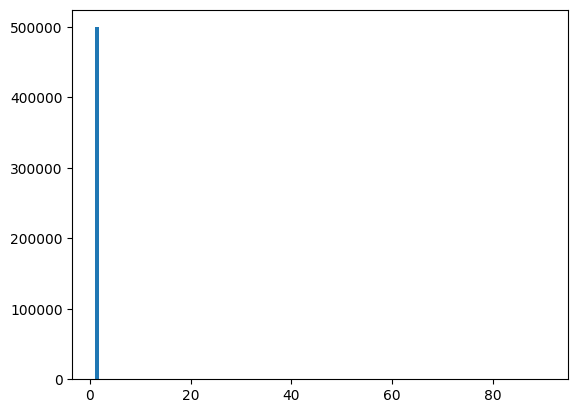

In [106]:
import matplotlib.pyplot as plt

plt.hist(g, bins=100)

In [93]:
en_to_bin(1000), en_to_bin(1040)

(27525, 27626)